## install deps

In [ ]:
!pip install -qq -U openmim==0.3.9
# !pip install -qq -U mmdet==3.2.0
!mim install -qq mmengine
!mim install -qq "mmcv>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -qq -v -e .
%cd /content

Cloning into 'mmdetection'...
remote: Enumerating objects: 37679, done.
remote: Counting objects: 100% (280/280), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 37679 (delta 114), reused 151 (delta 72), pack-reused 37399
Receiving objects: 100% (37679/37679), 63.04 MiB | 25.29 MiB/s, done.
Resolving deltas: 100% (25955/25955), done.
/content/mmdetection
  Preparing metadata (setup.py) ... done
/content


In [ ]:
!pip install -qq git+https://github.com/cocodataset/panopticapi.git

  Preparing metadata (setup.py) ... done


## download rtdet config and weights

In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 14.2 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content


## run test detection

In [ ]:
!python mmdetection/demo/image_demo.py \
        mmdetection/demo/demo.jpg \
        rtmdet_tiny_8xb32-300e_coco.py \
        --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth \
        --device cpu

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

12/05 11:13:40 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be

/content/outputs/vis


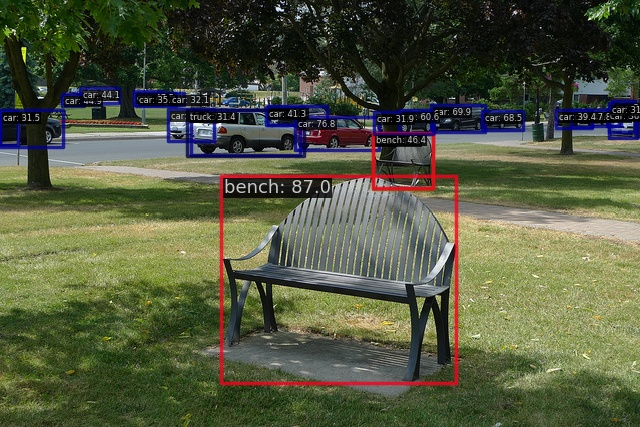

In [ ]:
%cd outputs/vis
from IPython.display import Image


display(Image("demo.jpg"))
%cd /content

## download cityscapes dataset

In [ ]:
import gdown

/content


In [ ]:
def download_from_colab(file_id: str):
    output_file = "cityscapes.zip"
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, output_file, quiet=True)

In [ ]:
%cd /content
%rm -rf data
%rm -rf cityscapes

/content


In [ ]:
download_from_colab("1PMPMfEKWK0kvwadQAtvcrEY1SDTYvRgt")

!mkdir -p data
!unzip -qq -o cityscapes.zip -d /content/data/cityscapes
!rm cityscapes.zip

In [ ]:
download_from_colab("1eUn338xKhhmJ6ykfWu0_CAwVMLZ7aFx1")

!mkdir -p data
!unzip -qq -o cityscapes.zip -d /content/data/cityscapes
!rm cityscapes.zip

## convert cityscapes to coco

In [ ]:
%cd /content
%mkdir -p scripts

/content


In [ ]:
!pip install -qq tqdm fire cityscapesscripts

In [ ]:
%%writefile scripts/convert_cityscapes_to_coco_panoptic.py
import os
import fire
import json
import glob
import numpy as np
import shutil
import PIL.Image as Image

from tqdm import tqdm
from joblib import Parallel, delayed
from panopticapi.utils import IdGenerator


try:
    # set up path for cityscapes scripts
    # sys.path.append('./cityscapesScripts/')
    from cityscapesscripts.helpers.labels import labels, id2label
except Exception:
    raise Exception("Please load Cityscapes scripts from https://github.com/mcordts/cityscapesScripts")


class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)


def image_converter(f, categories_dict, out_folder):
    original_format = np.array(Image.open(f))

    file_name = f.split('/')[-1]
    image_id = '_'.join(file_name.split('_')[:3])
    image_filename = '{}.png'.format(image_id)
    segm_filename = '{}.png'.format(image_id)

    # image entry, id for image is its filename without extension
    image_config = {
        "id": image_id,
        "width": original_format.shape[1],
        "height": original_format.shape[0],
        "file_name": image_filename
    }

    pan_format = np.zeros((original_format.shape[0], original_format.shape[1], 3), dtype=np.uint8)
    id_generator = IdGenerator(categories_dict)

    l = np.unique(original_format)
    segm_info = []
    for el in l:
        if el < 1000:
            semantic_id = el
            is_crowd = 1
        else:
            semantic_id = el // 1000
            is_crowd = 0
        if semantic_id not in categories_dict:
            continue
        if categories_dict[semantic_id]['isthing'] == 0:
            is_crowd = 0
        mask = original_format == el
        segment_id, color = id_generator.get_id_and_color(semantic_id)
        pan_format[mask] = color

        area = np.sum(mask)  # segment area computation

        # bbox computation for a segment
        hor = np.sum(mask, axis=0)
        hor_idx = np.nonzero(hor)[0]
        x = hor_idx[0]
        width = hor_idx[-1] - x + 1
        vert = np.sum(mask, axis=1)
        vert_idx = np.nonzero(vert)[0]
        y = vert_idx[0]
        height = vert_idx[-1] - y + 1
        bbox = [x, y, width, height]

        segm_info.append({
            "id": int(segment_id),
            "category_id": int(semantic_id),
            "area": area,
            "bbox": bbox,
            "iscrowd": is_crowd,
        })

    annotation_config = {
        'image_id': image_id,
        'file_name': segm_filename,
        "segments_info": segm_info,
    }

    Image.fromarray(pan_format).save(os.path.join(out_folder, segm_filename))
    return image_config, annotation_config


def panoptic_converter(
        gt_folder_path: str,
        gt_output_folder_path: str,
        gt_output_annotations_file_path: str,
        img_folder_path: str,
        img_output_folder_path: str,
        n_jobs: int = 4,
        remove_folders: bool = False,
):

    if not os.path.isdir(gt_output_folder_path):
        print("Creating folder {} for panoptic segmentation GT PNGs".format(gt_output_folder_path))
        os.mkdir(gt_output_folder_path)

    if not os.path.isdir(img_output_folder_path):
        print("Creating folder {} for panoptic segmentation 8-bit PNGs".format(img_output_folder_path))
        os.mkdir(img_output_folder_path)

    categories = []
    for idx, el in tqdm(enumerate(labels), total=len(labels), desc='Adding categories'):
        if el.ignoreInEval:
            continue

        categories.append({
            'id': el.id,
            'name': el.name,
            'color': el.color,
            'supercategory': el.category,
            'isthing': 1 if el.hasInstances else 0
        })

    categories_dict = {cat['id']: cat for cat in categories}

    gt_file_list = sorted(glob.glob(os.path.join(gt_folder_path, '*/*_gtFine_instanceIds.png')))

    result = Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(image_converter)(f, categories_dict, gt_output_folder_path)
        for f in tqdm(gt_file_list, total=len(gt_file_list), desc='Converting images')
    )
    images, annotations = list(zip(*result))

    d = {
        'images': images,
        'annotations': annotations,
        'categories': categories,
    }

    with open(gt_output_annotations_file_path, 'w') as f:
        json.dump(d, f, cls=NpEncoder)

    if remove_folders:
        shutil.rmtree(gt_folder_path)

    img_file_list = sorted(glob.glob(os.path.join(img_folder_path, '*/*_leftImg8bit.png')))
    Parallel(n_jobs=n_jobs, return_as="list")(
        delayed(shutil.copyfile)(
            f,
            os.path.join(img_output_folder_path, f"{'_'.join(f.split('/')[-1].split('_')[:3])}.png")
        )
        for f in tqdm(img_file_list, total=len(img_file_list), desc='Move 8-bit images')
    )

    if remove_folders:
        shutil.rmtree(img_folder_path)


fire.Fire(panoptic_converter)


Writing scripts/convert_cityscapes_to_coco_panoptic.py


In [ ]:
!mkdir -p data/cityscapes/annotations && \
python scripts/convert_cityscapes_to_coco_panoptic.py \
        --gt_folder_path=data/cityscapes/gtFine/test/ \
        --gt_output_folder_path=data/cityscapes/gtFine/cityscapes_panoptic_test/ \
        --gt_output_annotations_file_path=data/cityscapes/annotations/cityscapes_panoptic_test.json \
        --img_folder_path=data/cityscapes/leftImg8bit/test \
        --img_output_folder_path=data/cityscapes/leftImg8bit/cityscapes_panoptic_test \
        --n_jobs=6 && \
python scripts/convert_cityscapes_to_coco_panoptic.py \
        --gt_folder_path=data/cityscapes/gtFine/val/ \
        --gt_output_folder_path=data/cityscapes/gtFine/cityscapes_panoptic_val/ \
        --gt_output_annotations_file_path=data/cityscapes/annotations/cityscapes_panoptic_val.json \
        --img_folder_path=data/cityscapes/leftImg8bit/val \
        --img_output_folder_path=data/cityscapes/leftImg8bit/cityscapes_panoptic_val \
        --n_jobs=6 && \
python scripts/convert_cityscapes_to_coco_panoptic.py \
        --gt_folder_path=data/cityscapes/gtFine/train/ \
        --gt_output_folder_path=data/cityscapes/gtFine/cityscapes_panoptic_train/ \
        --gt_output_annotations_file_path=data/cityscapes/annotations/cityscapes_panoptic_train.json \
        --img_folder_path=data/cityscapes/leftImg8bit/train \
        --img_output_folder_path=data/cityscapes/leftImg8bit/cityscapes_panoptic_train \
        --n_jobs=6

Creating folder data/cityscapes/gtFine/cityscapes_panoptic_test/ for panoptic segmentation GT PNGs
Creating folder data/cityscapes/leftImg8bit/cityscapes_panoptic_test for panoptic segmentation 8-bit PNGs
Adding categories: 100% 35/35 [00:00<00:00, 499321.90it/s]
Converting images: 100% 1525/1525 [02:46<00:00,  9.14it/s]
Move 8-bit images: 100% 1525/1525 [00:28<00:00, 53.07it/s]
Creating folder data/cityscapes/gtFine/cityscapes_panoptic_val/ for panoptic segmentation GT PNGs
Creating folder data/cityscapes/leftImg8bit/cityscapes_panoptic_val for panoptic segmentation 8-bit PNGs
Adding categories: 100% 35/35 [00:00<00:00, 460190.09it/s]
Converting images: 100% 500/500 [03:49<00:00,  2.18it/s]
Move 8-bit images: 100% 500/500 [00:07<00:00, 64.13it/s]
Creating folder data/cityscapes/gtFine/cityscapes_panoptic_train/ for panoptic segmentation GT PNGs
Creating folder data/cityscapes/leftImg8bit/cityscapes_panoptic_train for panoptic segmentation 8-bit PNGs
Adding categories: 100% 35/35 [00:0

In [ ]:
!head -c 250 data/cityscapes/annotations/cityscapes_panoptic_train.json

{"images": [{"id": "aachen_000000_000019", "width": 2048, "height": 1024, "file_name": "aachen_000000_000019.png"}, {"id": "aachen_000001_000019", "width": 2048, "height": 1024, "file_name": "aachen_000001_000019.png"}, {"id": "aachen_000002_000019",

## download mask2former (coco and panoptic coco)

In [ ]:
%cd /content
!mim download mmdet --config mask2former_r50_8xb2-lsj-50e_coco-panoptic --dest .
!mim download mmdet --config mask2former_r50_8xb2-lsj-50e_coco --dest .

/content
processing mask2former_r50_8xb2-lsj-50e_coco-panoptic...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.3/396.3 MiB 5.4 MB/s eta 0:00:00
Successfully downloaded mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth to /content
Successfully dumped mask2former_r50_8xb2-lsj-50e_coco-panoptic.py to /content
processing mask2former_r50_8xb2-lsj-50e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 MiB 6.8 MB/s eta 0:00:00
Successfully downloaded mask2former_r50_8xb2-lsj-50e_coco_20220506_191028-41b088b6.pth to /content
Successfully dumped mask2former_r50_8xb2-lsj-50e_coco.py to /content


## run test segmentation mask2former coco

In [ ]:
!python mmdetection/demo/image_demo.py \
        mmdetection/demo/demo.jpg \
        mask2former_r50_8xb2-lsj-50e_coco.py \
        --weights mask2former_r50_8xb2-lsj-50e_coco_20220506_191028-41b088b6.pth \
        --device cpu

Loads checkpoint by local backend from path: mask2former_r50_8xb2-lsj-50e_coco_20220506_191028-41b088b6.pth
12/05 12:08:46 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshg

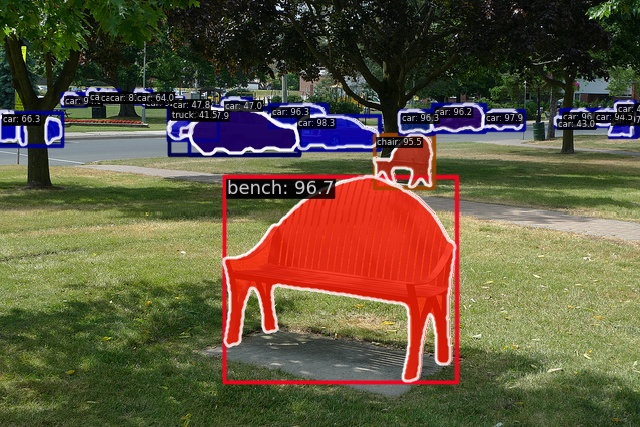

In [ ]:
from IPython.display import Image


Image("outputs/vis/demo.jpg")

## run test panoptic segmentation mask2former coco

In [ ]:
!python mmdetection/demo/image_demo.py \
        mmdetection/demo/demo.jpg \
        mask2former_r50_8xb2-lsj-50e_coco-panoptic.py \
        --weights mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth \
        --device cpu

Loads checkpoint by local backend from path: mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth
12/05 12:09:25 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return 

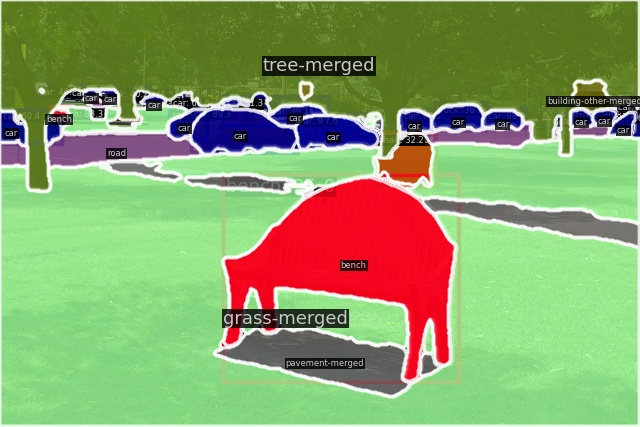

In [ ]:
from IPython.display import Image


Image("outputs/vis/demo.jpg")

## run test segmentation on one image from cityscapes

### CLI

In [ ]:
!python mmdetection/demo/image_demo.py \
        /content/data/cityscapes/leftImg8bit/train/krefeld/krefeld_000000_000108_leftImg8bit.png \
        mask2former_r50_8xb2-lsj-50e_coco-panoptic.py \
        --weights mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth \
        --device cpu

Loads checkpoint by local backend from path: mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth
12/05 12:10:02 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return 

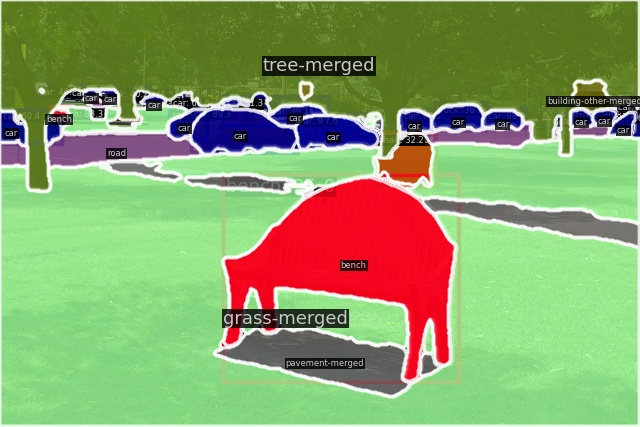

In [ ]:
from IPython.display import Image


Image("outputs/vis/demo.jpg")

Python SDK

In [ ]:
%cd /content/mmdetection
from mmdet.apis import DetInferencer


# Initialize the DetInferencer
inferencer = DetInferencer("mask2former_r50_8xb2-lsj-50e_coco-panoptic")

# Perform inference
inf_result = inferencer(
    "/content/data/cityscapes/leftImg8bit/train/krefeld/krefeld_000000_000108_leftImg8bit.png",
    return_vis=True,
    out_dir="./outputs",
)
%cd /content

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/mask2former/mask2former_r50_8xb2-lsj-50e_coco-panoptic/mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth


Downloading: "https://download.openmmlab.com/mmdetection/v3.0/mask2former/mask2former_r50_8xb2-lsj-50e_coco-panoptic/mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth" to /root/.cache/torch/hub/checkpoints/mask2former_r50_8xb2-lsj-50e_coco-panoptic_20230118_125535-54df384a.pth


Output()

/content


In [ ]:
inf_result.keys()

dict_keys(['predictions', 'visualization'])

In [ ]:
inf_result["predictions"][0].keys()

dict_keys(['labels', 'scores', 'bboxes', 'masks', 'panoptic_seg'])

In [ ]:
inf_result["predictions"][0]["panoptic_seg"]

array([[[ 91,   0,   0],
        [ 91,   0,   0],
        [ 91,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 91,   0,   0],
        [ 91,   0,   0],
        [ 91,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 91,   0,   0],
        [ 91,   0,   0],
        [ 91,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[100,   0,   0],
        [100,   0,   0],
        [100,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[100,   0,   0],
        [100,   0,   0],
        [100,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[100,   0,   0],
        [100,   0,   0],
        [100,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
inf_result["predictions"][0]["masks"][0]

{'size': [1024, 2048],
 'counts': 'n\\fP16io07J2N1O101N1O1O1O1O1N2O1O001O1O1O1O1O2N001N10001O0O100O1O1O1O100O0100000O1000O10000O1O1N3K4K5L5L3M4L5KYcem0'}

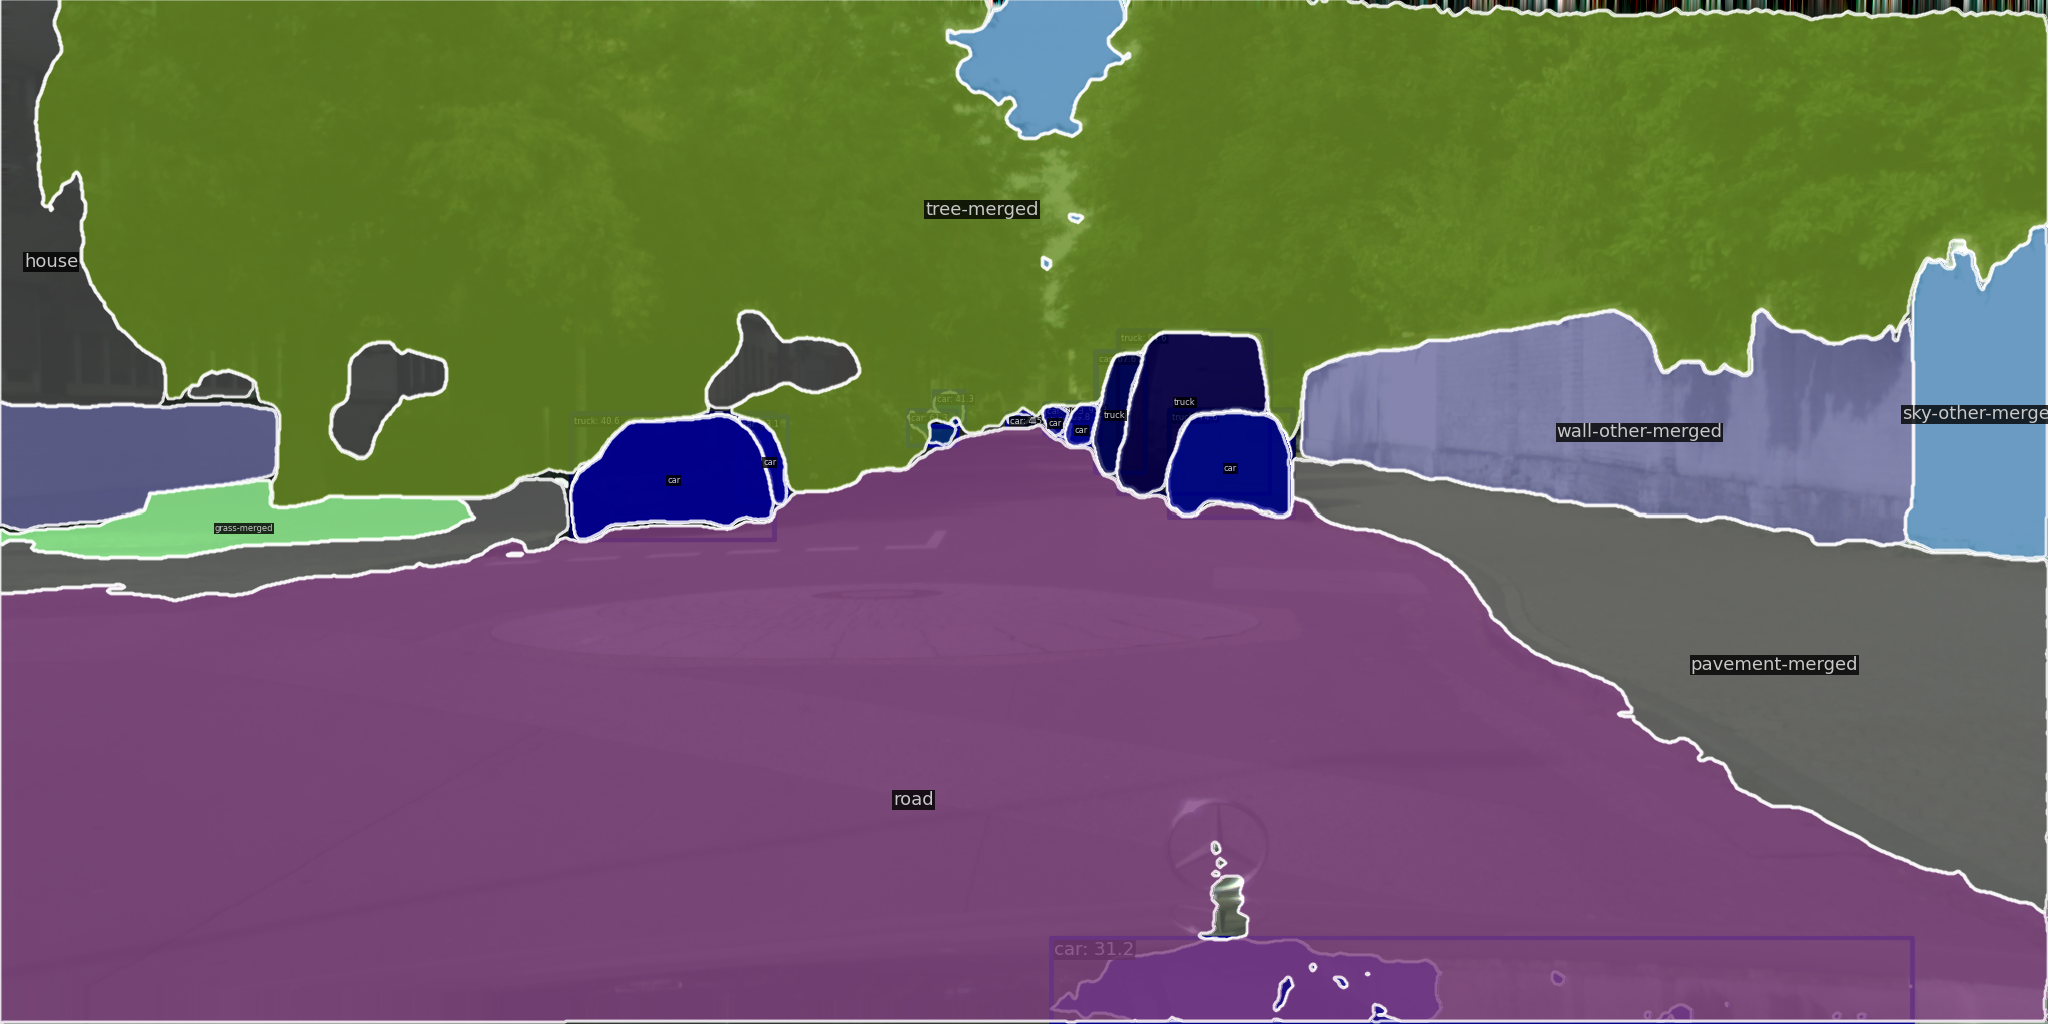

In [ ]:
from matplotlib import cm
from PIL import Image


im = Image.fromarray(inf_result["visualization"][0])
display(im)

In [ ]:
# from panopticapi import evaluation

# evaluation.pq_compute(
#     gt_json_file='/content/data/cityscapes/annotations/instancesonly_filtered_gtFine_train.json',
#     pred_json_file='',
# )

## Infer one image and compute metrics using torchmetrics

In [ ]:
# !pip install -qq torchmetrics==1.2.1

In [ ]:
# from torch import tensor

# preds = tensor([[[[6, 0], [0, 0], [6, 0], [6, 0]],
#                  [[0, 0], [0, 0], [6, 0], [0, 1]],
#                  [[0, 0], [0, 0], [6, 0], [0, 1]],
#                  [[0, 0], [7, 0], [6, 0], [1, 0]],
#                  [[0, 0], [7, 0], [7, 0], [7, 0]]]])
# target = tensor([[[[6, 0], [0, 1], [6, 0], [0, 1]],
#                   [[0, 1], [0, 1], [6, 0], [0, 1]],
#                   [[0, 1], [0, 1], [6, 0], [1, 0]],
#                   [[0, 1], [7, 0], [1, 0], [1, 0]],
#                   [[0, 1], [7, 0], [7, 0], [7, 0]]]])

# print(preds.shape, target.shape)

torch.Size([1, 5, 4, 2]) torch.Size([1, 5, 4, 2])


In [ ]:
# from torchmetrics.detection import PanopticQuality

# metric = PanopticQuality(things = {0, 1}, stuffs = {6, 7})
# metric.update(preds, target)
# fig_, ax_ = metric.plot()

AttributeError: ignored

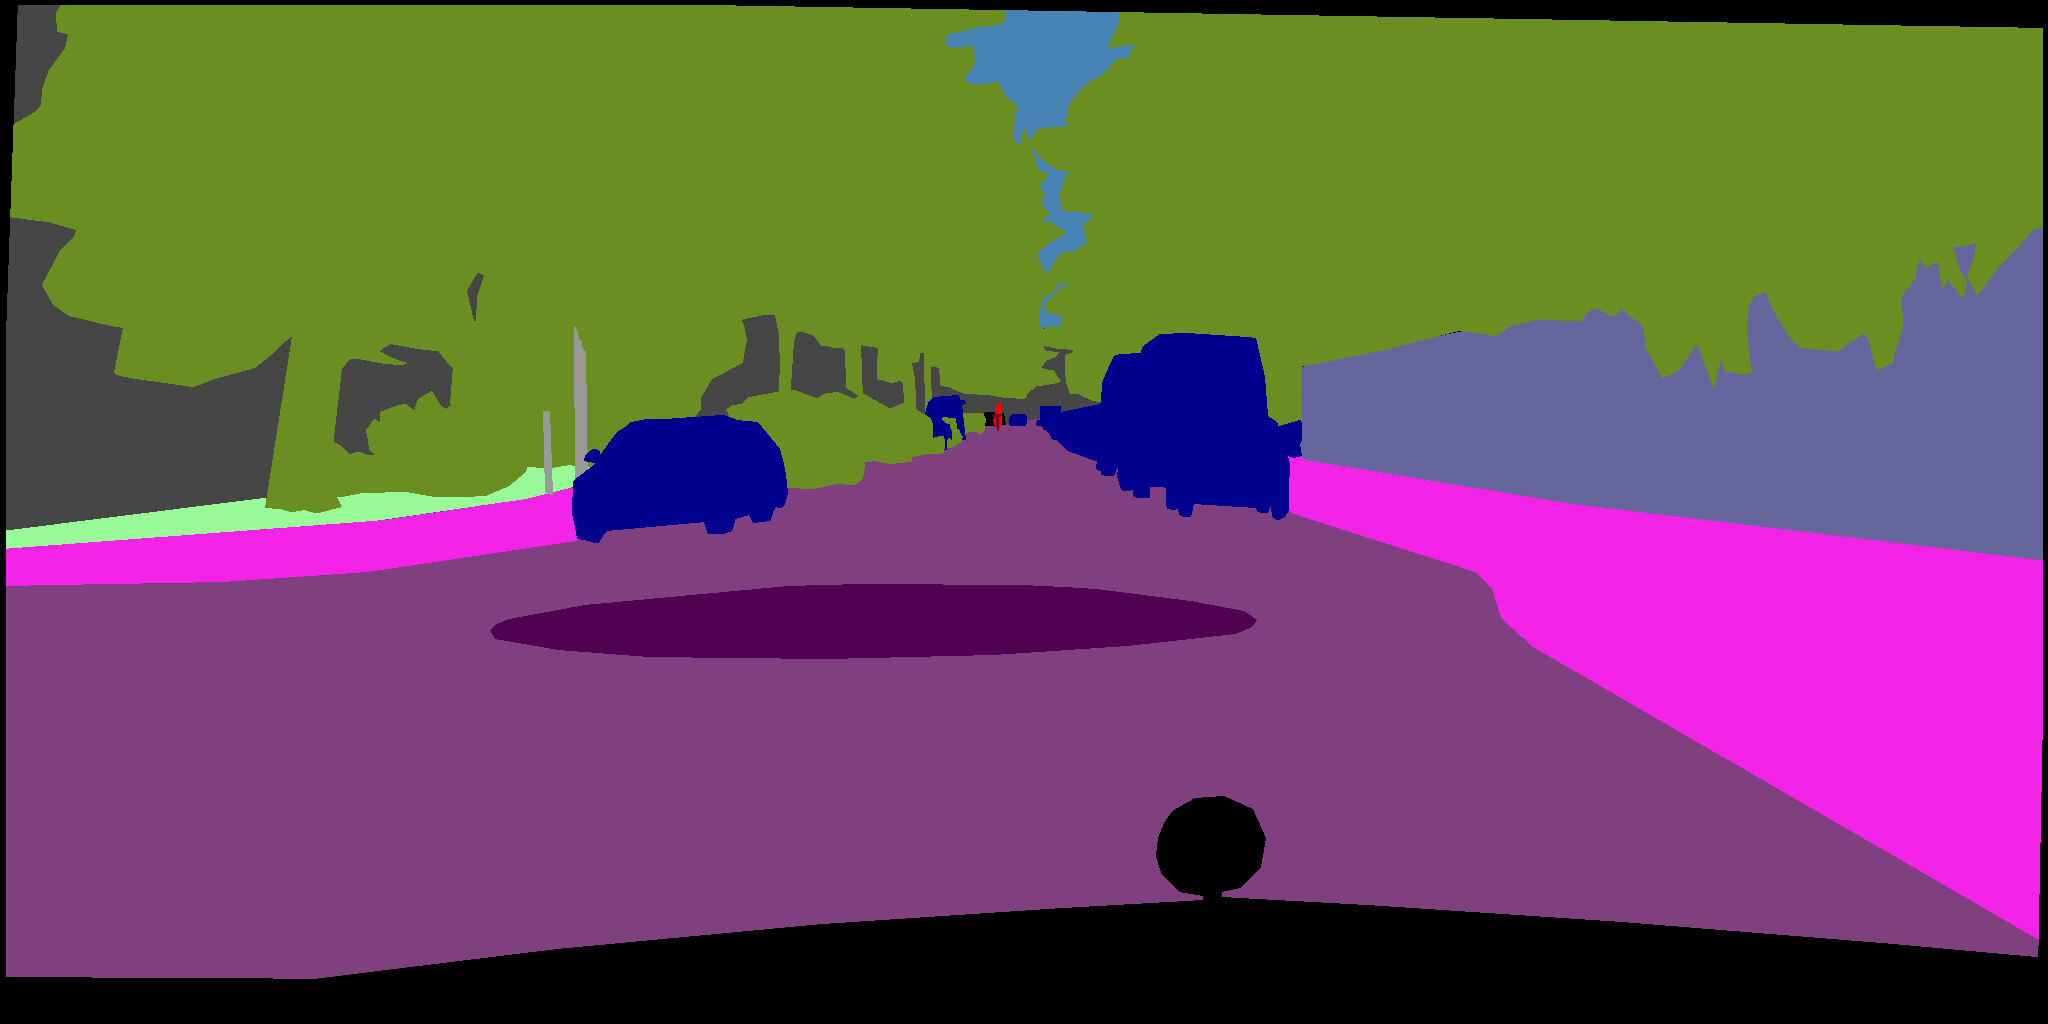

In [ ]:
from IPython.display import Image


Image("/content/data/cityscapes/gtFine/train/krefeld/krefeld_000000_000108_gtFine_color.png")

## train mask2former on cityscapes dataset

In [ ]:
%cd /content/
%rm -rf work_dirs

/content


In [ ]:
%%writefile mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py
auto_scale_lr = dict(base_batch_size=16, enable=False)  # base_batch_size=8
backend_args = None
batch_augments = [
    dict(
        img_pad_value=0,
        mask_pad_value=0,
        pad_mask=True,
        pad_seg=True,
        seg_pad_value=255,
        size=(
            1024,
            1024,
        ),
        type="BatchFixedSizePad",
    ),
]
data_preprocessor = dict(
    batch_augments=[
        dict(
            img_pad_value=0,
            mask_pad_value=0,
            pad_mask=True,
            pad_seg=True,
            seg_pad_value=255,
            size=(
                1024,
                1024,
            ),
            type="BatchFixedSizePad",
        ),
    ],
    bgr_to_rgb=True,
    mask_pad_value=0,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_mask=True,
    pad_seg=True,
    pad_size_divisor=32,
    seg_pad_value=255,
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type="DetDataPreprocessor",
)
data_root = "./data/cityscapes/"
dataset_type = "CityscapesPanopticDataset"
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=5000, max_keep_ckpts=3, save_last=True, type="CheckpointHook"),
    logger=dict(interval=50, type="LoggerHook"),
    param_scheduler=dict(type="ParamSchedulerHook"),
    sampler_seed=dict(type="DistSamplerSeedHook"),
    timer=dict(type="IterTimerHook"),
    visualization=dict(type="DetVisualizationHook"),
)
default_scope = "mmdet"
dynamic_intervals = [
    (
        365001,
        368750,
    ),
]
embed_multi = dict(decay_mult=0.0, lr_mult=1.0)
env_cfg = dict(
    cudnn_benchmark=False, dist_cfg=dict(backend="nccl"), mp_cfg=dict(mp_start_method="fork", opencv_num_threads=0)
)
image_size = (
    1024,
    1024,
)
interval = 5000
load_from = None
log_level = "INFO"
log_processor = dict(by_epoch=False, type="LogProcessor", window_size=50)
max_iters = 368750
model = dict(
    backbone=dict(
        depth=50,
        frozen_stages=-1,
        init_cfg=dict(checkpoint="torchvision://resnet50", type="Pretrained"),
        norm_cfg=dict(requires_grad=False, type="BN"),
        norm_eval=True,
        num_stages=4,
        out_indices=(
            0,
            1,
            2,
            3,
        ),
        style="pytorch",
        type="ResNet",
    ),
    data_preprocessor=dict(
        batch_augments=[
            dict(
                img_pad_value=0,
                mask_pad_value=0,
                pad_mask=True,
                pad_seg=True,
                seg_pad_value=255,
                size=(
                    1024,
                    1024,
                ),
                type="BatchFixedSizePad",
            ),
        ],
        bgr_to_rgb=True,
        mask_pad_value=0,
        mean=[
            123.675,
            116.28,
            103.53,
        ],
        pad_mask=True,
        pad_seg=True,
        pad_size_divisor=32,
        seg_pad_value=255,
        std=[
            58.395,
            57.12,
            57.375,
        ],
        type="DetDataPreprocessor",
    ),
    init_cfg=None,
    panoptic_fusion_head=dict(
        init_cfg=None,
        loss_panoptic=None,
        num_stuff_classes=11,  # 53
        num_things_classes=8,  # 80
        type="MaskFormerFusionHead",
    ),
    panoptic_head=dict(
        enforce_decoder_input_project=False,
        feat_channels=256,
        in_channels=[
            256,
            512,
            1024,
            2048,
        ],
        loss_cls=dict(
            class_weight=[
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                1.0,
                0.1,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 1.0,
                # 0.1,
            ],
            loss_weight=2.0,
            reduction="mean",
            type="CrossEntropyLoss",
            use_sigmoid=False,
        ),
        loss_dice=dict(
            activate=True,
            eps=1.0,
            loss_weight=5.0,
            naive_dice=True,
            reduction="mean",
            type="DiceLoss",
            use_sigmoid=True,
        ),
        loss_mask=dict(loss_weight=5.0, reduction="mean", type="CrossEntropyLoss", use_sigmoid=True),
        num_queries=100,
        num_stuff_classes=11,  # 53
        num_things_classes=8,  # 80
        num_transformer_feat_level=3,
        out_channels=256,
        pixel_decoder=dict(
            act_cfg=dict(type="ReLU"),
            encoder=dict(
                layer_cfg=dict(
                    ffn_cfg=dict(
                        act_cfg=dict(inplace=True, type="ReLU"),
                        embed_dims=256,
                        feedforward_channels=1024,
                        ffn_drop=0.0,
                        num_fcs=2,
                    ),
                    self_attn_cfg=dict(
                        batch_first=True, dropout=0.0, embed_dims=256, num_heads=8, num_levels=3, num_points=4
                    ),
                ),
                num_layers=6,
            ),
            norm_cfg=dict(num_groups=32, type="GN"),
            num_outs=3,
            positional_encoding=dict(normalize=True, num_feats=128),
            type="MSDeformAttnPixelDecoder",
        ),
        positional_encoding=dict(normalize=True, num_feats=128),
        strides=[
            4,
            8,
            16,
            32,
        ],
        transformer_decoder=dict(
            init_cfg=None,
            layer_cfg=dict(
                cross_attn_cfg=dict(batch_first=True, dropout=0.0, embed_dims=256, num_heads=8),
                ffn_cfg=dict(
                    act_cfg=dict(inplace=True, type="ReLU"),
                    embed_dims=256,
                    feedforward_channels=2048,
                    ffn_drop=0.0,
                    num_fcs=2,
                ),
                self_attn_cfg=dict(batch_first=True, dropout=0.0, embed_dims=256, num_heads=8),
            ),
            num_layers=9,
            return_intermediate=True,
        ),
        type="Mask2FormerHead",
    ),
    test_cfg=dict(
        filter_low_score=True, instance_on=True, iou_thr=0.8, max_per_image=100, panoptic_on=True, semantic_on=False
    ),
    train_cfg=dict(
        assigner=dict(
            match_costs=[
                dict(type="ClassificationCost", weight=2.0),
                dict(type="CrossEntropyLossCost", use_sigmoid=True, weight=5.0),
                dict(eps=1.0, pred_act=True, type="DiceCost", weight=5.0),
            ],
            type="HungarianAssigner",
        ),
        importance_sample_ratio=0.75,
        num_points=12544,
        oversample_ratio=3.0,
        sampler=dict(type="MaskPseudoSampler"),
    ),
    type="Mask2Former",
)
num_classes = 19  # 133
num_stuff_classes = 11  # 53
num_things_classes = 8  # 80
optim_wrapper = dict(
    clip_grad=dict(max_norm=0.01, norm_type=2),
    optimizer=dict(
        betas=(
            0.9,
            0.999,
        ),
        eps=1e-08,
        lr=0.0001,
        type="AdamW",
        weight_decay=0.05,
    ),
    paramwise_cfg=dict(
        custom_keys=dict(
            backbone=dict(decay_mult=1.0, lr_mult=0.1),
            level_embed=dict(decay_mult=0.0, lr_mult=1.0),
            query_embed=dict(decay_mult=0.0, lr_mult=1.0),
            query_feat=dict(decay_mult=0.0, lr_mult=1.0),
        ),
        norm_decay_mult=0.0,
    ),
    type="OptimWrapper",
)
param_scheduler = dict(
    begin=0,
    by_epoch=False,
    end=368750,
    gamma=0.1,
    milestones=[
        327778,
        355092,
    ],
    type="MultiStepLR",
)
resume = False
test_cfg = dict(type="TestLoop")
test_dataloader = dict(
    batch_size=1,
    dataset=dict(
        ann_file="annotations/cityscapes_panoptic_val.json",
        backend_args=None,
        data_prefix=dict(img="leftImg8bit/cityscapes_panoptic_val/", seg="gtFine/cityscapes_panoptic_val/"),
        data_root="./data/cityscapes/",
        pipeline=[
            dict(backend_args=None, type="LoadImageFromFile"),
            dict(
                keep_ratio=True,
                scale=(
                    1333,
                    800,
                ),
                type="Resize",
            ),
            dict(backend_args=None, type="LoadPanopticAnnotations"),
            dict(
                meta_keys=(
                    "img_id",
                    "img_path",
                    "ori_shape",
                    "img_shape",
                    "scale_factor",
                ),
                type="PackDetInputs",
            ),
        ],
        test_mode=True,
        type="CityscapesPanopticDataset",
    ),
    drop_last=False,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(shuffle=False, type="DefaultSampler"),
)
test_evaluator = [
    dict(
        ann_file="./data/cityscapes/annotations/cityscapes_panoptic_val.json",
        backend_args=None,
        seg_prefix="./data/cityscapes/gtFine/cityscapes_panoptic_val",
        type="CocoPanopticMetric",
    ),
    # dict(
    #     ann_file='data/cityscapes/annotations/cityscapes_instances_val.json',
    #     backend_args=None,
    #     metric=[
    #         'bbox',
    #         'segm',
    #     ],
    #     type='CocoMetric'),
]
test_pipeline = [
    dict(backend_args=None, type="LoadImageFromFile"),
    dict(
        keep_ratio=True,
        scale=(
            1333,
            800,
        ),
        type="Resize",
    ),
    dict(backend_args=None, type="LoadPanopticAnnotations"),
    dict(
        meta_keys=(
            "img_id",
            "img_path",
            "ori_shape",
            "img_shape",
            "scale_factor",
        ),
        type="PackDetInputs",
    ),
]
train_cfg = dict(
    dynamic_intervals=[
        (
            365001,
            368750,
        ),
    ],
    max_iters=10000,  # 368750
    type="IterBasedTrainLoop",
    val_interval=5000,
)
train_dataloader = dict(
    batch_sampler=dict(type="AspectRatioBatchSampler"),
    batch_size=1,  # 2
    dataset=dict(
        ann_file="annotations/cityscapes_panoptic_train.json",
        backend_args=None,
        data_prefix=dict(img="leftImg8bit/cityscapes_panoptic_train/", seg="gtFine/cityscapes_panoptic_train/"),
        data_root="./data/cityscapes/",
        filter_cfg=dict(filter_empty_gt=True, min_size=32),
        pipeline=[
            dict(backend_args=None, to_float32=True, type="LoadImageFromFile"),
            dict(backend_args=None, type="LoadPanopticAnnotations", with_bbox=True, with_mask=True, with_seg=True),
            dict(prob=0.5, type="RandomFlip"),
            dict(
                keep_ratio=True,
                ratio_range=(
                    0.1,
                    2.0,
                ),
                scale=(
                    1024,
                    1024,
                ),
                type="RandomResize",
            ),
            dict(
                allow_negative_crop=True,
                crop_size=(
                    1024,
                    1024,
                ),
                crop_type="absolute",
                recompute_bbox=True,
                type="RandomCrop",
            ),
            dict(type="PackDetInputs"),
        ],
        type="CityscapesPanopticDataset",
    ),
    num_workers=2,
    persistent_workers=True,
    sampler=dict(shuffle=True, type="DefaultSampler"),
)
train_pipeline = [
    dict(backend_args=None, to_float32=True, type="LoadImageFromFile"),
    dict(backend_args=None, type="LoadPanopticAnnotations", with_bbox=True, with_mask=True, with_seg=True),
    dict(prob=0.5, type="RandomFlip"),
    dict(
        keep_ratio=True,
        ratio_range=(
            0.1,
            2.0,
        ),
        scale=(
            1024,
            1024,
        ),
        type="RandomResize",
    ),
    dict(
        allow_negative_crop=True,
        crop_size=(
            1024,
            1024,
        ),
        crop_type="absolute",
        recompute_bbox=True,
        type="RandomCrop",
    ),
    dict(type="PackDetInputs"),
]
val_cfg = dict(type="ValLoop")
val_dataloader = dict(
    batch_size=1,
    dataset=dict(
        ann_file="annotations/cityscapes_panoptic_val.json",
        backend_args=None,
        data_prefix=dict(img="leftImg8bit/cityscapes_panoptic_val/", seg="gtFine/cityscapes_panoptic_val/"),
        data_root="./data/cityscapes/",
        pipeline=[
            dict(backend_args=None, type="LoadImageFromFile"),
            dict(
                keep_ratio=True,
                scale=(
                    1333,
                    800,
                ),
                type="Resize",
            ),
            dict(backend_args=None, type="LoadPanopticAnnotations"),
            dict(
                meta_keys=(
                    "img_id",
                    "img_path",
                    "ori_shape",
                    "img_shape",
                    "scale_factor",
                ),
                type="PackDetInputs",
            ),
        ],
        test_mode=True,
        type="CityscapesPanopticDataset",
    ),
    drop_last=False,
    num_workers=2,
    persistent_workers=True,
    sampler=dict(shuffle=False, type="DefaultSampler"),
)
val_evaluator = [
    dict(
        ann_file="./data/cityscapes/annotations/cityscapes_panoptic_val.json",
        backend_args=None,
        seg_prefix="./data/cityscapes/gtFine/cityscapes_panoptic_val/",
        type="CocoPanopticMetric",
    ),
    # dict(
    #     ann_file='data/cityscapes/annotations/cityscapes_instances_val.json',
    #     backend_args=None,
    #     metric=[
    #         'bbox',
    #         'segm',
    #     ],
    #     type='CocoMetric'),
]
vis_backends = [
    dict(type="LocalVisBackend"),
]
visualizer = dict(
    name="visualizer",
    type="DetLocalVisualizer",
    vis_backends=[
        dict(type="LocalVisBackend"),
    ],
)


Overwriting mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py


In [ ]:
%%writefile /content/mmdetection/mmdet/datasets/cityscapes_panoptic_dataset.py
from mmdet.datasets.api_wrappers import COCOPanoptic
from mmdet.datasets.coco_panoptic import CocoPanopticDataset
from mmdet.registry import DATASETS


@DATASETS.register_module()
class CityscapesPanopticDataset(CocoPanopticDataset):
    METAINFO = {
        "classes": (
            "road",
            "sidewalk",
            "building",
            "wall",
            "fence",
            "pole",
            "traffic light",
            "traffic sign",
            "vegetation",
            "terrain",
            "sky",
            "person",
            "rider",
            "car",
            "truck",
            "bus",
            "train",
            "motorcycle",
            "bicycle",
        ),
        "thing_classes": (
            "person",
            "rider",
            "car",
            "truck",
            "bus",
            "train",
            "motorcycle",
            "bicycle",
        ),
        "stuff_classes": (
            "road",
            "sidewalk",
            "building",
            "wall",
            "fence",
            "pole",
            "traffic light",
            "traffic sign",
            "vegetation",
            "terrain",
            "sky",
        ),
        "palette": [
            (128, 64, 128),
            (244, 35, 232),
            (70, 70, 70),
            (102, 102, 156),
            (190, 153, 153),
            (153, 153, 153),
            (250, 170, 30),
            (220, 220, 0),
            (107, 142, 35),
            (152, 251, 152),
            (70, 130, 180),
            (220, 20, 60),
            (255, 0, 0),
            (0, 0, 142),
            (0, 0, 70),
            (0, 60, 100),
            (0, 80, 100),
            (0, 0, 230),
            (119, 11, 32),
        ],
    }
    COCOAPI = COCOPanoptic
    # ann_id is not unique in coco panoptic dataset.
    ANN_ID_UNIQUE = False


Overwriting /content/mmdetection/mmdet/datasets/cityscapes_panoptic_dataset.py


In [ ]:
%%writefile /content/mmdetection/mmdet/datasets/__init__.py
# Copyright (c) OpenMMLab. All rights reserved.
from .ade20k import (ADE20KInstanceDataset, ADE20KPanopticDataset,
                     ADE20KSegDataset)
from .base_det_dataset import BaseDetDataset
from .base_semseg_dataset import BaseSegDataset
from .base_video_dataset import BaseVideoDataset
from .cityscapes import CityscapesDataset
from .coco import CocoDataset
from .coco_caption import CocoCaptionDataset
from .coco_panoptic import CocoPanopticDataset
from .coco_semantic import CocoSegDataset
from .crowdhuman import CrowdHumanDataset
from .dataset_wrappers import ConcatDataset, MultiImageMixDataset
from .deepfashion import DeepFashionDataset
from .dsdl import DSDLDetDataset
from .isaid import iSAIDDataset
from .lvis import LVISDataset, LVISV1Dataset, LVISV05Dataset
from .mot_challenge_dataset import MOTChallengeDataset
from .objects365 import Objects365V1Dataset, Objects365V2Dataset
from .openimages import OpenImagesChallengeDataset, OpenImagesDataset
from .refcoco import RefCocoDataset
from .reid_dataset import ReIDDataset
from .samplers import (AspectRatioBatchSampler, ClassAwareSampler,
                       GroupMultiSourceSampler, MultiSourceSampler,
                       TrackAspectRatioBatchSampler, TrackImgSampler)
from .utils import get_loading_pipeline
from .v3det import V3DetDataset
from .voc import VOCDataset
from .wider_face import WIDERFaceDataset
from .xml_style import XMLDataset
from .youtube_vis_dataset import YouTubeVISDataset
from .cityscapes_panoptic_dataset import CityscapesPanopticDataset

__all__ = [
    'XMLDataset', 'CocoDataset', 'DeepFashionDataset', 'VOCDataset',
    'CityscapesDataset', 'LVISDataset', 'LVISV05Dataset', 'LVISV1Dataset',
    'WIDERFaceDataset', 'get_loading_pipeline', 'CocoPanopticDataset',
    'MultiImageMixDataset', 'OpenImagesDataset', 'OpenImagesChallengeDataset',
    'AspectRatioBatchSampler', 'ClassAwareSampler', 'MultiSourceSampler',
    'GroupMultiSourceSampler', 'BaseDetDataset', 'CrowdHumanDataset',
    'Objects365V1Dataset', 'Objects365V2Dataset', 'DSDLDetDataset',
    'BaseVideoDataset', 'MOTChallengeDataset', 'TrackImgSampler',
    'ReIDDataset', 'YouTubeVISDataset', 'TrackAspectRatioBatchSampler',
    'ADE20KPanopticDataset', 'CocoCaptionDataset', 'RefCocoDataset',
    'BaseSegDataset', 'ADE20KSegDataset', 'CocoSegDataset',
    'ADE20KInstanceDataset', 'iSAIDDataset', 'V3DetDataset', 'ConcatDataset', 'CityscapesPanopticDataset'
]

Overwriting /content/mmdetection/mmdet/datasets/__init__.py


In [ ]:
import locale


locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import torch


with torch.no_grad():
    torch.cuda.empty_cache()
!nvidia-smi

Tue Dec  5 13:33:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |   1613MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python mmdetection/tools/train.py mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py

12/05 13:33:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 262164767
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60

In [ ]:
# !rm -rf /content/outputs/

In [ ]:
!python /content/mmdetection/demo/image_demo.py \
		/content/mmdetection/demo/demo.jpg \
        /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py \
        --weights /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/iter_1000.pth \
        --device cpu

Loads checkpoint by local backend from path: /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/iter_1000.pth
12/05 13:13:27 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:

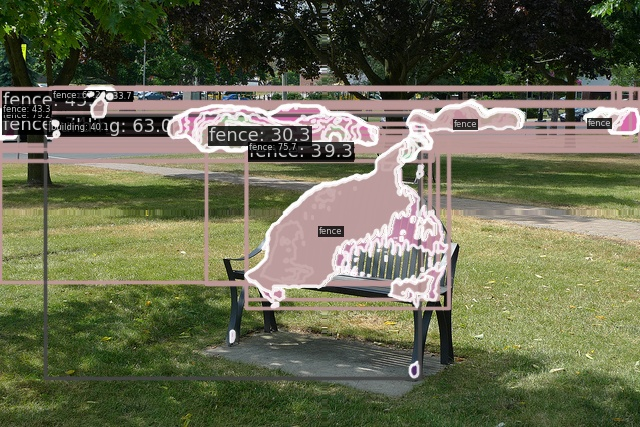

In [ ]:
from IPython.display import Image


Image("outputs/vis/demo.jpg")

In [ ]:
!python /content/mmdetection/demo/image_demo.py \
		/content/data/cityscapes/leftImg8bit/train/krefeld/krefeld_000000_000108_leftImg8bit.png \
        /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py \
        --weights /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/iter_1000.pth \
        --device cpu

Loads checkpoint by local backend from path: /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/iter_1000.pth
12/05 13:15:19 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an 
upcoming release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:

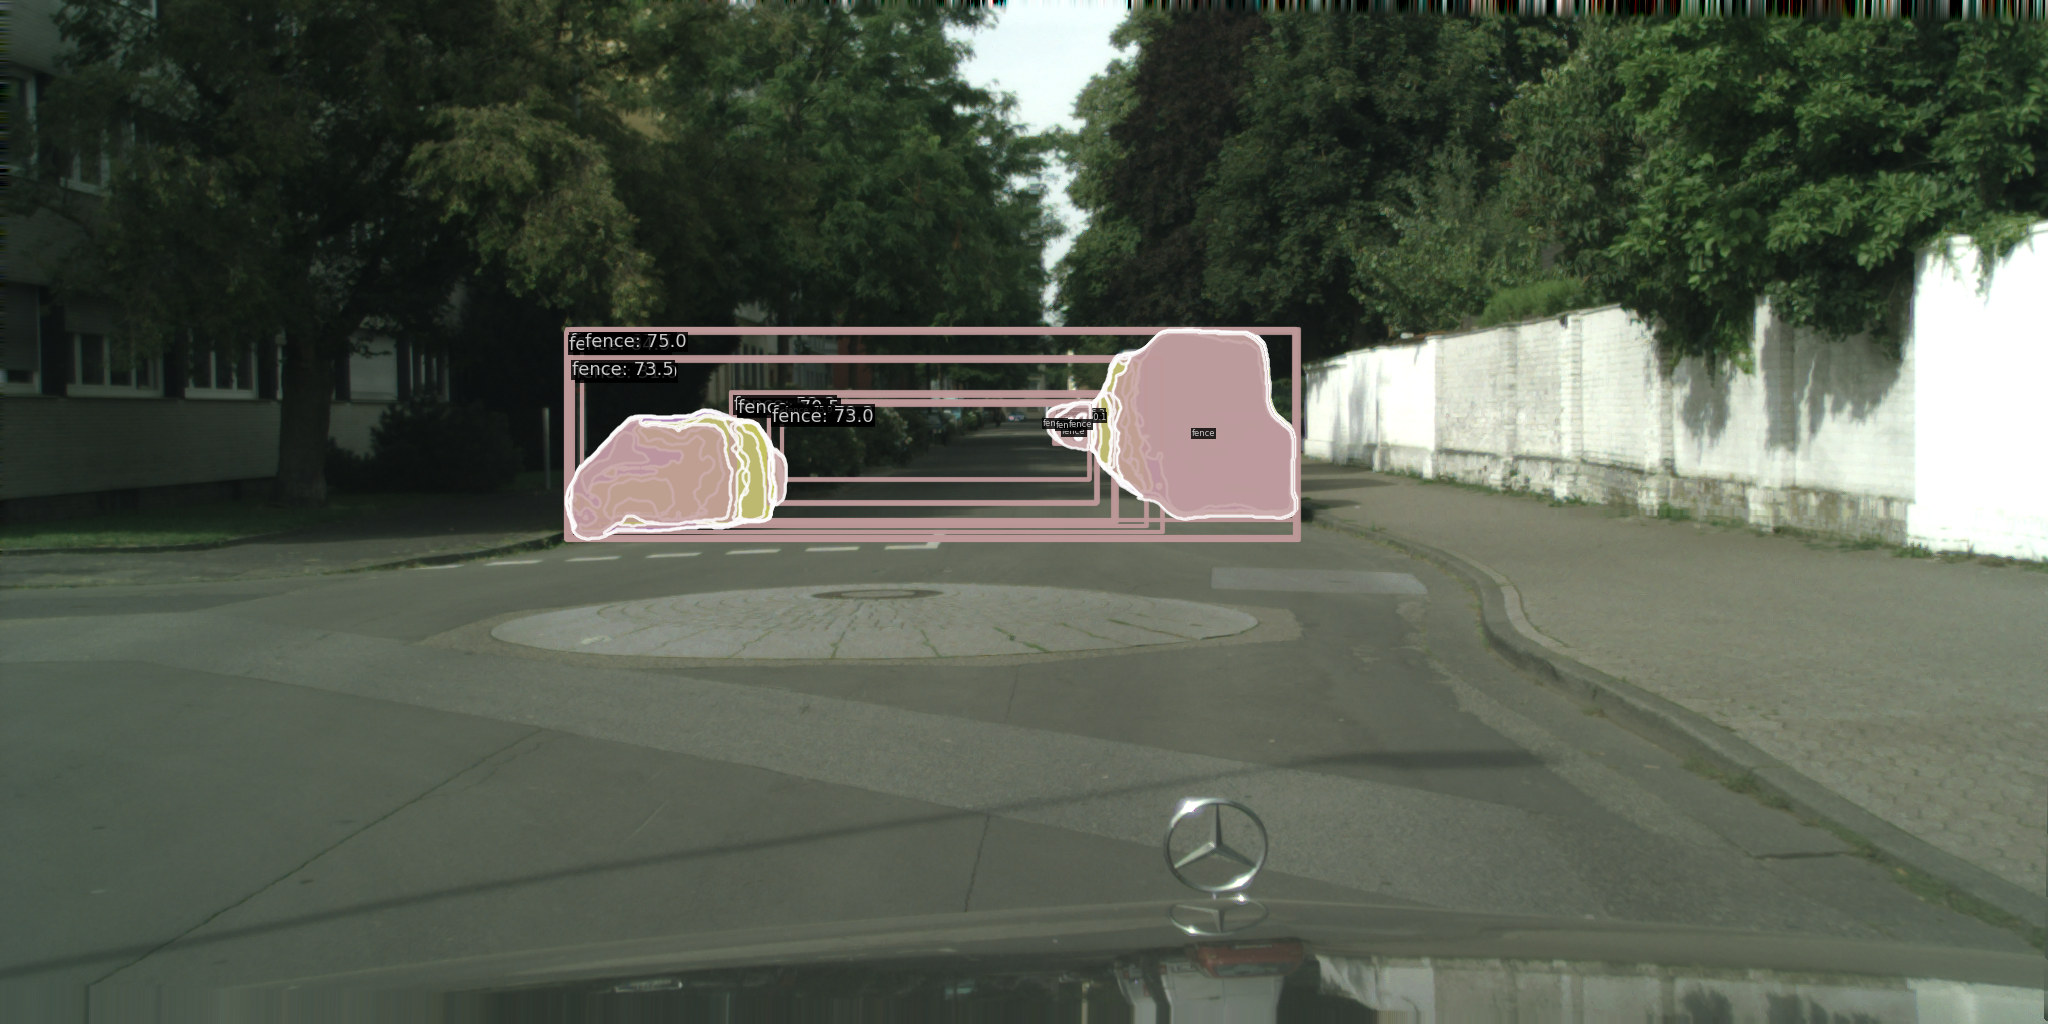

In [ ]:
from IPython.display import Image


Image("outputs/vis/krefeld_000000_000108_leftImg8bit.png")

In [ ]:
!python mmdetection/tools/test.py \
        /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train.py \
        /content/work_dirs/mask2former_r50_8xb2-lsj-50e_cityscapes-panoptic_train/iter_1000.pth

12/05 13:18:45 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: True
    numpy_random_seed: 1043096928
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_6

In [ ]:
%cd /content
!python mmdetection/tools/train.py \
        mmdetection/configs/mask2former/mask2former_r50_8xb2-lsj-50e_coco-panoptic.py

In [ ]:
%cd /content

%rm -rf data

/content


In [ ]:
%cd /content

%mkdir data
%cd data
%mkdir coco
%cd coco
%mkdir images
%cd images

# !wget -c http://images.cocodataset.org/zips/train2017.zip
!wget -c http://images.cocodataset.org/zips/val2017.zip
!wget -c http://images.cocodataset.org/zips/test2017.zip
# !wget -c http://images.cocodataset.org/zips/unlabeled2017.zip

# !unzip train2017.zip
!unzip val2017.zip
!unzip test2017.zip
# !unzip unlabeled2017.zip

# %rm train2017.zip
%rm val2017.zip
%rm test2017.zip
# %rm unlabeled2017.zip

%cd ../
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!wget -c http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!wget -c http://images.cocodataset.org/annotations/image_info_test2017.zip
!wget -c http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip
!wget http://images.cocodataset.org/annotations/panoptic_annotations_trainval2017.zip

!unzip annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!unzip image_info_test2017.zip
!unzip image_info_unlabeled2017.zip
!unzip panoptic_annotations_trainval2017.zip

%rm annotations_trainval2017.zip
%rm stuff_annotations_trainval2017.zip
%rm image_info_test2017.zip
%rm image_info_unlabeled2017.zip
%rm panoptic_annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: test2017/000000038897.jpg  
 extracting: test2017/000000003032.jpg  
 extracting: test2017/000000435650.jpg  
 extracting: test2017/000000344161.jpg  
 extracting: test2017/000000460425.jpg  
 extracting: test2017/000000308283.jpg  
 extracting: test2017/000000363526.jpg  
 extracting: test2017/000000089153.jpg  
 extracting: test2017/000000332839.jpg  
 extracting: test2017/000000113502.jpg  
 extracting: test2017/000000133926.jpg  
 extracting: test2017/000000197935.jpg  
 extracting: test2017/000000122076.jpg  
 extracting: test2017/000000501877.jpg  
 extracting: test2017/000000528048.jpg  
 extracting: test2017/000000570312.jpg  
 extracting: test2017/000000523967.jpg  
 extracting: test2017/000000025819.jpg  
 extracting: test2017/000000109719.jpg  
 extracting: test2017/000000241105.jpg  
 extracting: test2017/000000548033.jpg  
 extracting: test2017/000000448241.jpg  
 extracting: test2017/000000433732.jpg  
 extra